# UCI Repository의 Online Retail II 데이터 세트를 활용한 고객 분류

## 영국 소재 온라인 상점 데이터 2009-2011
## 선물 용품 판매
## 주 고객은 도매업체

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/인공지능기반고객구매요인분석과의사결정과정/datas/online_retail_II.xlsx")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [ ]:
df[['Description', 'Customer ID', 'Country']].nunique()

Description    4681
Customer ID    4383
Country          40
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df['Customer ID'] = df['Customer ID'].astype('str')
df['Customer ID'] = df['Customer ID'].apply(lambda x : x[:-2])

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


# 주어진 데이터에서 새로운 데이터 생성(Feature Engineering)

### 1. 수량(Quantity)과 가격(Price)을 곱해 총 구매 금액(Total) 산출 후 추가

In [ ]:
df['Total'] = df['Quantity'] * df['Price']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50


## 2. ID별 구매 횟수를 계산해 frequency 추가

In [ ]:
frequency = df.groupby('Customer ID')['InvoiceDate'].count()
frequency

Customer ID
12346        46
12347        71
12348        20
12349       107
12351        21
          ...  
18284        29
18285        12
18286        70
18287        86
n        107927
Name: InvoiceDate, Length: 4384, dtype: int64

In [ ]:
df['frequency'] = df['Customer ID'].apply(lambda x: frequency[x] if x in frequency else 0)

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,frequency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,63
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,63
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,63
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,63
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,63
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,165
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,165
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,165
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,165


## 3. ID별 구매 금액을 합산해 Total_balance 컬럼 추가

In [ ]:
Total_balance = df.groupby("Customer ID")['Total'].sum()

In [ ]:
df['Total_balance'] = df['Customer ID'].apply(lambda x: Total_balance[x] if x in Total_balance else 0)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,frequency,Total_balance
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,63,1187.08
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,63,1187.08
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,63,1187.08
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,63,1187.08
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,63,1187.08
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,165,755.56
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,165,755.56
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,165,755.56
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,165,755.56


## 4. ID별로 구매제품의 가격 평균을 산출해 avg_price 컬럼 추가

In [ ]:
avg_price = df.groupby("Customer ID")['Price'].mean()
df['avg_price'] = df['Customer ID'].apply(lambda x: avg_price[x] if x in avg_price else 0)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,frequency,Total_balance,avg_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,63,1187.08,16.53
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,63,1187.08,16.53
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,63,1187.08,16.53
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,63,1187.08,16.53
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,63,1187.08,16.53
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,165,755.56,2.52
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,165,755.56,2.52
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,165,755.56,2.52
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,165,755.56,2.52


## 고객ID, 국가, 구매빈도, 총구매금액, 구매제품의 평균 가격만 모아서 새로운 데이터 프레임 생성

In [ ]:
databybalance = df[['Customer ID',	'Country',	'frequency',	'Total_balance',	'avg_price']]
databybalance

,Customer ID,Country,frequency,Total_balance,avg_price
0,13085,United Kingdom,63,1187.08,16.53
1,13085,United Kingdom,63,1187.08,16.53
2,13085,United Kingdom,63,1187.08,16.53
3,13085,United Kingdom,63,1187.08,16.53
4,13085,United Kingdom,63,1187.08,16.53
...,...,...,...,...,...
525456,17530,United Kingdom,165,755.56,2.52
525457,17530,United Kingdom,165,755.56,2.52
525458,17530,United Kingdom,165,755.56,2.52
525459,17530,United Kingdom,165,755.56,2.52


## 고객 ID 별로 중복된 데이터를 제거하고 ID당 1개의 정보만 남김

In [ ]:
databybalance = databybalance.drop_duplicates( subset=['Customer ID'], keep='last')
databybalance

,Customer ID,Country,frequency,Total_balance,avg_price
126,12636,USA,1,141.00,141.00
173,12362,Belgium,1,130.00,130.00
262,17592,United Kingdom,26,0.00,3.97
1134,17641,United Kingdom,1,-6.95,6.95
1256,17056,United Kingdom,8,128.60,4.12
...,...,...,...,...,...
525327,14713,United Kingdom,370,2708.21,2.11
525357,14702,United Kingdom,376,3445.08,3.64
525370,13230,United Kingdom,728,3553.81,2.60
525395,13969,United Kingdom,482,4226.08,2.46


## 머신러닝 알고리즘에 데이터를 넣기 위해 문자형 데이터를 숫자로 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
def lec(df):
  for i in df.columns:
    if df[i].dtype == 'O':
      df[i] = df[i].astype('str')
      print(i, df[i].dtype)
      globals()['le_{}'.format(i)] = LabelEncoder()
      df[i] = globals()['le_{}'.format(i)].fit_transform(df[i])
    elif df[i].dtype == '<M8[ns]':
      df[i] = df[i].dt.date
      df[i] = df[i].astype('str')
      globals()['le_{}'.format(i)] = LabelEncoder()
      df[i] = globals()['le_{}'.format(i)].fit_transform(df[i])
      return df
    else:
      continue
  return df
  

In [ ]:
databybalance2 = lec(databybalance.copy())
databybalance2

Customer ID object
Country object


,Customer ID,Country,frequency,Total_balance,avg_price
126,181,32,1,141.00,141.00
173,14,3,1,130.00,130.00
262,3869,34,26,0.00,3.97
1134,3907,34,1,-6.95,6.95
1256,3453,34,8,128.60,4.12
...,...,...,...,...,...
525327,1715,34,370,2708.21,2.11
525357,1707,34,376,3445.08,3.64
525370,615,34,728,3553.81,2.60
525395,1154,34,482,4226.08,2.46


In [ ]:
databybalance2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4384 entries, 126 to 525460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    4384 non-null   int64  
 1   Country        4384 non-null   int64  
 2   frequency      4384 non-null   int64  
 3   Total_balance  4384 non-null   float64
 4   avg_price      4384 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 205.5 KB


## 비지도학습인 K평균 알고리즘으로 고객 데이터 분류(기본 5개 그룹 설정)

In [ ]:
from sklearn.cluster import KMeans
X = databybalance2

In [ ]:
km =KMeans(n_clusters=5)
km.fit(X)
databybalance['label'] = km.labels_
databybalance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Customer ID,Country,frequency,Total_balance,avg_price,label
126,12636,USA,1,141.00,141.00,0
173,12362,Belgium,1,130.00,130.00,0
262,17592,United Kingdom,26,0.00,3.97,0
1134,17641,United Kingdom,1,-6.95,6.95,0
1256,17056,United Kingdom,8,128.60,4.12,0
...,...,...,...,...,...,...
525327,14713,United Kingdom,370,2708.21,2.11,0
525357,14702,United Kingdom,376,3445.08,3.64,0
525370,13230,United Kingdom,728,3553.81,2.60,0
525395,13969,United Kingdom,482,4226.08,2.46,0


## 원래 데이터프레임에 군집 분석 결과인 label 컬럼을 추가하고 각 군집별 고객 수 검토

In [ ]:
databybalance['label'].value_counts()

0    4310
4      65
3       6
2       2
1       1
Name: label, dtype: int64

In [ ]:
databybalance.groupby('label').mean()

,frequency,Total_balance,avg_price
label,,,
0,82.63,1268.35,23.75
1,107927.00,1191276.06,7.79
2,1220.00,292814.89,6.62
3,1917.83,115093.73,4.58
4,730.20,24698.85,7.08


## 그룹 수를 2-10까지 늘려가며 최적의 그룹 수 탐색

In [ ]:
distance = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(X)
    distance.append(model.inertia_)

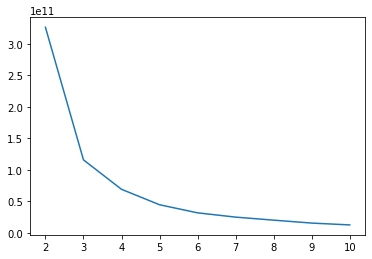

In [ ]:
sns.lineplot(x=list(range(2,11)), y=distance)

## 3-4에서 급격하게 효율이 감소하는 것으로 보아 3혹은 4개 그룹으로 분류하는 것이 합당

In [ ]:
km =KMeans(n_clusters=3)
km.fit(X)
databybalance['label'] = km.labels_
databybalance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Customer ID,Country,frequency,Total_balance,avg_price,label
126,12636,USA,1,141.00,141.00,0
173,12362,Belgium,1,130.00,130.00,0
262,17592,United Kingdom,26,0.00,3.97,0
1134,17641,United Kingdom,1,-6.95,6.95,0
1256,17056,United Kingdom,8,128.60,4.12,0
...,...,...,...,...,...,...
525327,14713,United Kingdom,370,2708.21,2.11,0
525357,14702,United Kingdom,376,3445.08,3.64,0
525370,13230,United Kingdom,728,3553.81,2.60,0
525395,13969,United Kingdom,482,4226.08,2.46,0


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
databybalance.groupby('label').mean()

,frequency,Total_balance,avg_price
label,,,
0,92.67,1670.52,23.49
1,107927.00,1191276.06,7.79
2,2366.60,206931.73,6.63


In [ ]:
databybalance.loc[databybalance['label'] == 0] 

,Customer ID,Country,frequency,Total_balance,avg_price,label
126,12636,USA,1,141.00,141.00,0
173,12362,Belgium,1,130.00,130.00,0
262,17592,United Kingdom,26,0.00,3.97,0
1134,17641,United Kingdom,1,-6.95,6.95,0
1256,17056,United Kingdom,8,128.60,4.12,0
...,...,...,...,...,...,...
525327,14713,United Kingdom,370,2708.21,2.11,0
525357,14702,United Kingdom,376,3445.08,3.64,0
525370,13230,United Kingdom,728,3553.81,2.60,0
525395,13969,United Kingdom,482,4226.08,2.46,0


In [ ]:
databybalance.loc[databybalance['label'] == 1] 

,Customer ID,Country,frequency,Total_balance,avg_price,label
525235,n,United Kingdom,107927,1191276.06,7.79,1


In [ ]:
databybalance.loc[databybalance['label'] == 2] 

,Customer ID,Country,frequency,Total_balance,avg_price,label
502711,14646,Netherlands,1805,243853.05,3.15,2
503671,13694,United Kingdom,973,128172.42,1.85,2
509304,14156,EIRE,2710,183180.55,11.03,2
523025,14911,EIRE,5710,137675.91,7.05,2
523466,18102,United Kingdom,635,341776.73,10.09,2


In [ ]:
databybalance.loc[databybalance['label'] == 2, ['Customer ID']] 

,Customer ID
502711,14646
503671,13694
509304,14156
523025,14911
523466,18102


In [ ]:
cidle2 = databybalance.loc[databybalance['label'] == 2, ['Customer ID']] 
cidle2

,Customer ID
502711,14646
503671,13694
509304,14156
523025,14911
523466,18102


In [ ]:
type(cidle2)

pandas.core.frame.DataFrame

In [ ]:
for i in cidle2['Customer ID']:
  print("Customer ID: ", i+"\n", df.loc[df['Customer ID'] == i, ['Description', 'Total']].value_counts(), end="\n\n")
  

Customer ID:  14646
 Description                         Total 
RED SPOTTY BISCUIT TIN              78.00     12
RED SPOTTY CHARLOTTE BAG            72.00     10
WOODLAND CHARLOTTE BAG              72.00      9
FOLKART ZINC HEART CHRISTMAS DEC    207.36     9
PACK OF 60 MUSHROOM CAKE CASES      50.40      8
                                              ..
LARGE RED BABUSHKA NOTEBOOK         2.50       1
                                    76.32      1
LARGE WHITE HONEYCOMB PAPER BELL    162.24     1
LARGE YELLOW BABUSHKA NOTEBOOK      2.50       1
ZINC WILLIE WINKIE  CANDLE STICK    69.12      1
Length: 1196, dtype: int64

Customer ID:  13694
 Description                         Total 
JUMBO STORAGE BAG SUKI              330.00    4
JUMBO BAG STRAWBERRY                330.00    3
PINK 5 PATCH FLOWER CUSHION COVER   234.00    3
BATHROOM METAL SIGN                 105.00    3
BLUE 5 PATCH FLOWER CUSHION COVER   234.00    3
                                             ..
GARDENERS KNEELIN

In [ ]:
pd.set_option("display.max_rows", 50)

In [ ]:
df.loc[df['Customer ID'] == "14646", ['Description', 'Total']].value_counts()

Description                         Total 
RED SPOTTY BISCUIT TIN              78.00     12
RED SPOTTY CHARLOTTE BAG            72.00     10
WOODLAND CHARLOTTE BAG              72.00      9
FOLKART ZINC HEART CHRISTMAS DEC    207.36     9
PACK OF 60 MUSHROOM CAKE CASES      50.40      8
                                              ..
LARGE RED BABUSHKA NOTEBOOK         2.50       1
                                    76.32      1
LARGE WHITE HONEYCOMB PAPER BELL    162.24     1
LARGE YELLOW BABUSHKA NOTEBOOK      2.50       1
ZINC WILLIE WINKIE  CANDLE STICK    69.12      1
Length: 1196, dtype: int64

In [ ]:
df.loc[df['Customer ID'] == "14911", ['Description', 'Total']].value_counts()

Description                         Total
CARRIAGE                            50.00    64
60 TEATIME FAIRY CAKE CASES         13.20    25
PACK OF 72 RETRO SPOT CAKE CASES    13.20    20
PACK OF 60 PINK PAISLEY CAKE CASES  13.20    14
COOK WITH WINE METAL SIGN           23.40    14
                                             ..
GREY HEART HOT WATER BOTTLE         30.00     1
GROW YOUR OWN HERBS SET OF 3        15.90     1
                                    31.80     1
                                    63.60     1
ZINC WILLIE WINKIE  CANDLE STICK    20.40     1
Length: 3020, dtype: int64

In [ ]:
df['Customer ID'].apply(lambda x : x in cidle2['Customer ID']).sum()

0

In [ ]:
databybalance2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4384 entries, 126 to 525460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    4384 non-null   int64  
 1   Country        4384 non-null   object 
 2   frequency      4384 non-null   int64  
 3   Total_balance  4384 non-null   float64
 4   avg_price      4384 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 205.5+ KB


In [ ]:
# df['Customer ID'] = df['Customer ID'].astype('str')

In [ ]:
# df.info()

In [ ]:
# df['Description'] = df['Description'].fillna('None')

In [ ]:
# df['Description'] = df['Description'].astype('str')
# df['Description']

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vect = CountVectorizer()
# temp = vect.fit_transform(df['Description'])
# temp.toarray()

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Invoice'] = le.fit_transform(df['Invoice'])
# df

In [ ]:
for i in df[1:]:
  if df[i].dtype == 'O':
    df[i] = df[i].astype('str')
    print(i, df[i].dtype)
    globals()['le_{}'.format(i)] = LabelEncoder()
    df[i] = globals()['le_{}'.format(i)].fit_transform(df[i])
  elif df[i].dtype == '<M8[ns]':
    df[i] = df[i].dt.date
    df[i] = df[i].astype('str')
    globals()['le_{}'.format(i)] = LabelEncoder()
    df[i] = globals()['le_{}'.format(i)].fit_transform(df[i])
  else:
    continue
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  int64  
 1   StockCode    525461 non-null  int64  
 2   Description  525461 non-null  int64  
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  int64  
 5   Price        525461 non-null  float64
 6   Customer ID  525461 non-null  int64  
 7   Country      525461 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 32.1 MB


## 상품별 구매 횟수에 따른 고객 분류

In [ ]:
df_byDesc = (df.groupby(['Description', 'Customer ID'])['Quantity'].sum())
df_byDesc

Description                          Customer ID
21494                                n             -720
22467                                n               -2
22719                                n                2
  DOORMAT UNION JACK GUNS AND ROSES  13037            2
                                     13085           12
                                                   ... 
wet/smashed/unsellable               n             -700
wonky bottom/broken                  n              -35
wrong code                           n             -258
wrong ctn size                       n             -626
wrong invc                           n               70
Name: Quantity, Length: 285780, dtype: int64

In [ ]:
pd.set_option('display.max_row', 500)

str

In [ ]:
df['Description'] = df['Description'].apply(lambda x: str(x).strip())

In [ ]:
df_byDesc = df_byDesc.to_frame()
df_byDesc

Quantity
Description                         Customer ID          
21494                               n                -720
22467                               n                  -2
22719                               n                   2
  DOORMAT UNION JACK GUNS AND ROSES 13037               2
                                    13085              12
...                                                   ...
wet/smashed/unsellable              n                -700
wonky bottom/broken                 n                 -35
wrong code                          n                -258
wrong ctn size                      n                -626
wrong invc                          n                  70

[285780 rows x 1 columns]

In [ ]:
df_byDesc.sort_values(by='Quantity', ascending=False).head(100)

,,Quantity
Description,Customer ID,
BLACK AND WHITE PAISLEY FLOWER MUG,13902,25164
BROCADE RING PURSE,15838,23760
WORLD WAR 2 GLIDERS ASSTD DESIGNS,16754,20160
FLAG OF ST GEORGE CAR FLAG,n,18014
PACK OF 12 SUKI TISSUES,17940,15800
PACK OF 12 PINK PAISLEY TISSUES,17940,15008
PACK OF 12 WOODLAND TISSUES,17940,14320
PACK OF 12 RED SPOTTY TISSUES,17940,14008
SET/6 WOODLAND PAPER PLATES,13902,12960


In [ ]:
df.loc[df['Description'] == "BLACK AND WHITE PAISLEY FLOWER MUG"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,frequency,Total_balance,avg_price
951,489542,37410,BLACK AND WHITE PAISLEY FLOWER MUG,216,2009-12-01 12:19:00,0.85,15061,United Kingdom,183.60,588,82162.74,2.24
2545,489601,37410,BLACK AND WHITE PAISLEY FLOWER MUG,1,2009-12-01 14:44:00,16.48,n,United Kingdom,16.48,107927,1191276.06,7.79
14883,490625,37410,BLACK AND WHITE PAISLEY FLOWER MUG,12,2009-12-07 11:55:00,1.25,14543,United Kingdom,15.00,168,9277.84,7.23
18310,490938,37410,BLACK AND WHITE PAISLEY FLOWER MUG,12,2009-12-08 13:59:00,1.25,14605,United Kingdom,15.00,111,937.16,3.39
18949,490963,37410,BLACK AND WHITE PAISLEY FLOWER MUG,1,2009-12-08 15:49:00,16.48,n,United Kingdom,16.48,107927,1191276.06,7.79
20052,491041,37410,BLACK AND WHITE PAISLEY FLOWER MUG,1,2009-12-09 09:42:00,16.48,n,United Kingdom,16.48,107927,1191276.06,7.79
22196,491148,37410,BLACK AND WHITE PAISLEY FLOWER MUG,72,2009-12-10 07:43:00,1.06,15061,United Kingdom,76.32,588,82162.74,2.24
27645,491713,37410,BLACK AND WHITE PAISLEY FLOWER MUG,12,2009-12-13 15:24:00,1.25,17819,United Kingdom,15.00,53,2907.65,3.30
30911,491969,37410,BLACK AND WHITE PAISLEY FLOWER MUG,1,2009-12-14 17:57:00,16.48,n,United Kingdom,16.48,107927,1191276.06,7.79
31496,491970,37410,BLACK AND WHITE PAISLEY FLOWER MUG,1,2009-12-14 18:03:00,16.48,n,United Kingdom,16.48,107927,1191276.06,7.79


In [ ]:
FlowerMUG = df.loc[df['Description'] == "BLACK AND WHITE PAISLEY FLOWER MUG"]

In [ ]:
(FlowerMUG.groupby('Customer ID')['Quantity'].sum()).sort_values(ascending=False)

Customer ID
13902    25164
15061      408
17819       24
n           22
14315       12
14543       12
14605       12
16888       12
17400       12
18286       12
13357        6
17591        4
15898        1
12748        0
Name: Quantity, dtype: int64

In [ ]:
df.loc[df['Description'] == "BROCADE RING PURSE"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,frequency,Total_balance,avg_price


In [ ]:
BROCADE_RING_PURSE = df.loc[df['Description'] == "BROCADE RING PURSE"]
(BROCADE_RING_PURSE.groupby('Customer ID')['Quantity'].sum()).sort_values(ascending=False)

Customer ID
15838    23760
16422     9360
14609     2880
17414     2160
17428      720
14533      720
17596      502
14676      360
14298      360
18258      308
13026      252
n          217
15555      205
14460      200
15860      180
16223      180
16221      180
17604      144
14435      144
15498      144
17345      144
13585      144
13975      108
15306      108
17011      108
16399      108
14000      108
13745      108
14631      108
14085      108
16719      102
15382       86
17768       84
16601       72
13139       72
15013       72
15456       72
16358       72
13167       72
17190       72
16713       72
12621       72
12921       72
16131       72
16334       72
17977       72
18218       72
17422       72
15924       72
17448       72
18279       50
16212       50
13192       50
18078       48
16491       36
16332       36
16735       36
16547       36
18140       36
16600       36
16823       36
16984       36
18128       36
18100       36
17211       36
17400       3